Hypothesis:cough_symptom,Shortness_breath,sore_throat should play a major role in predicting the outcome variable

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 


In [2]:
df=pd.read_csv('corona_tested_006.csv')

C:\Users\SREENIVASAN\AppData\Local\Temp\ipykernel_288\1957926266.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('corona_tested_006.csv')


In [3]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
df.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets remove date and id colums .

In [5]:
df1=df.drop(['Ind_ID','Test_date'],axis=1)

In [6]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


Our target variable is corona lets keep that at last colum.

In [7]:
df1=df1.iloc[:,[0,1,2,3,4,6,7,8,5]]

In [8]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,TRUE,FALSE,TRUE,FALSE,FALSE,None,None,Abroad,negative
1,FALSE,TRUE,FALSE,FALSE,FALSE,None,None,Abroad,positive
2,FALSE,TRUE,FALSE,FALSE,FALSE,None,None,Abroad,positive
3,TRUE,FALSE,FALSE,FALSE,FALSE,None,None,Abroad,negative
4,TRUE,FALSE,FALSE,FALSE,FALSE,None,None,Contact with confirmed,negative


In [9]:
df1.describe()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
count,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,5,5,5,5,5,3,3,3,3
top,False,False,False,False,False,None,female,Other,negative
freq,127531,137774,212584,212842,212326,127320,130158,242741,260227


We can see 5 unique values in first 5 columns and 3 unique values in rest of the values lets explore it a bit more.

In [10]:
df1.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Age_60_above           0
Sex                    0
Known_contact          0
Corona                 0
dtype: int64

In [11]:
for i in df1.columns:
    print(i,df1[i].unique())

Cough_symptoms ['TRUE' 'FALSE' 'None' False True]
Fever ['FALSE' 'TRUE' 'None' False True]
Sore_throat ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath ['FALSE' 'TRUE' 'None' False True]
Headache ['FALSE' 'TRUE' 'None' False True]
Age_60_above ['None' 'No' 'Yes']
Sex ['None' 'male' 'female']
Known_contact ['Abroad' 'Contact with confirmed' 'Other']
Corona ['negative' 'positive' 'other']


we see none in many columns lets replace it by np.nan and see the percent of missing values.

In [12]:
df2=df1.replace('None',np.nan)

In [13]:
df2.isnull().mean()

Cough_symptoms         0.000904
Fever                  0.000904
Sore_throat            0.000004
Shortness_of_breath    0.000004
Headache               0.000004
Age_60_above           0.456593
Sex                    0.070157
Known_contact          0.000000
Corona                 0.000000
dtype: float64

<AxesSubplot:>

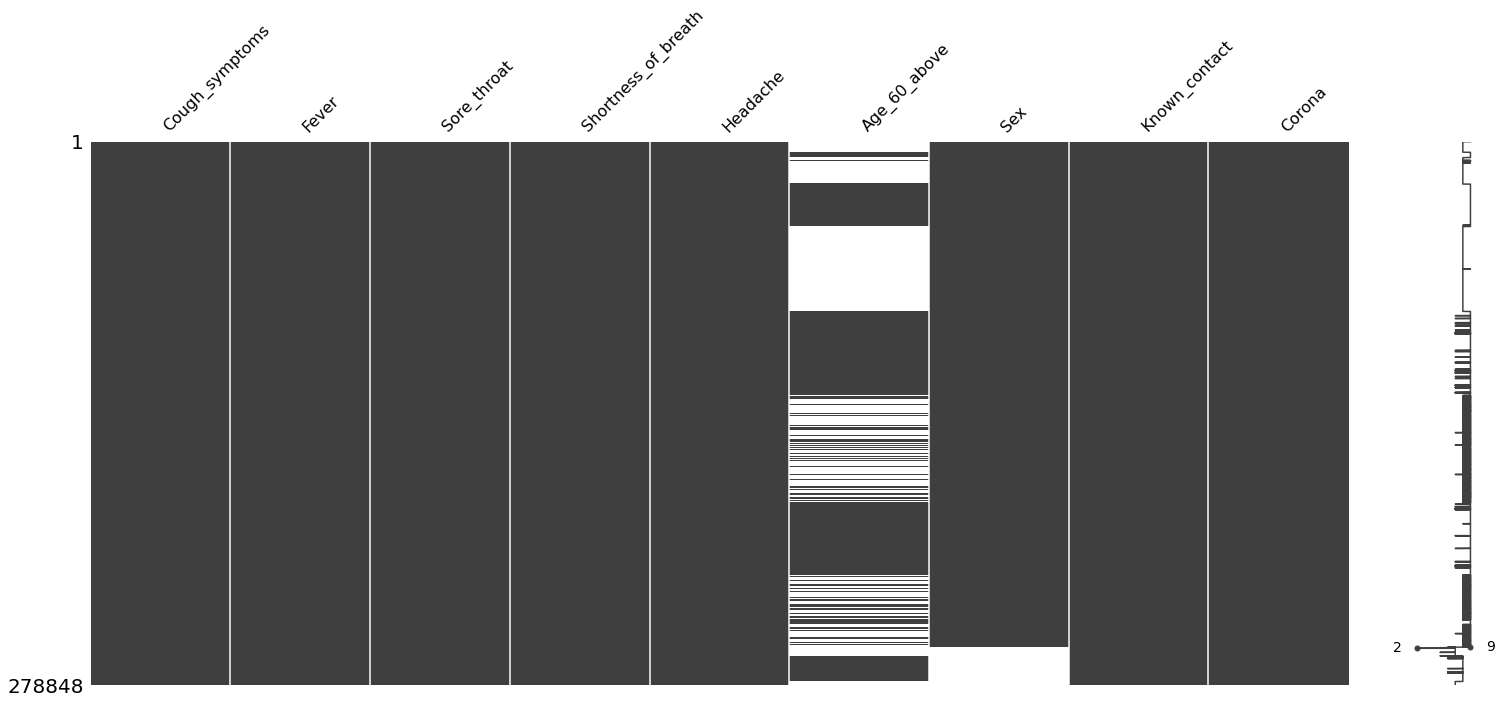

In [14]:
sorted = df2.sort_values('Sex')
msno.matrix(sorted)

Age above 60 colum has 45 percent missing values lets remove it.

In [15]:
df3=df2.drop(['Age_60_above'],axis=1)

In [16]:


df3.isnull().sum()

Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Sex                    19563
Known_contact              0
Corona                     0
dtype: int64

other columns has missing values less than 1 percent lets remove the values 

In [17]:
df4=df3.dropna()

In [18]:
df4.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
13727,TRUE,FALSE,FALSE,FALSE,FALSE,male,Abroad,negative
13728,TRUE,FALSE,FALSE,FALSE,FALSE,female,Abroad,negative
13730,TRUE,TRUE,FALSE,FALSE,FALSE,female,Other,positive
13731,FALSE,FALSE,FALSE,FALSE,FALSE,female,Other,other
13732,FALSE,FALSE,FALSE,FALSE,FALSE,female,Other,other


In [19]:
df4.shape

(259042, 8)

In [20]:
for i in df4.columns:
    print(df4[i].unique())

['TRUE' 'FALSE' False True]
['FALSE' 'TRUE' False True]
['FALSE' 'TRUE' False True]
['FALSE' 'TRUE' False True]
['FALSE' 'TRUE' False True]
['male' 'female']
['Abroad' 'Other' 'Contact with confirmed']
['negative' 'positive' 'other']


we see others in our target variable lets see the percentage 

In [21]:
df4['Corona'].value_counts()/len(df4)

negative    0.934736
positive    0.052239
other       0.013025
Name: Corona, dtype: float64

Lets drop it if we try to impute it might create bias.

In [22]:
df4['Corona']=df4['Corona'].replace('other',np.nan)

C:\Users\SREENIVASAN\AppData\Local\Temp\ipykernel_288\1680926944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Corona']=df4['Corona'].replace('other',np.nan)


In [23]:
df5=df4.dropna()

In [24]:
df5 = df5.replace(['TRUE','FALSE',True,False], ['True','False','True','False'])

In [25]:
for i in df5.columns:
    print(df5[i].unique())

['True' 'False']
['False' 'True']
['False' 'True']
['False' 'True']
['False' 'True']
['male' 'female']
['Abroad' 'Other' 'Contact with confirmed']
['negative' 'positive']


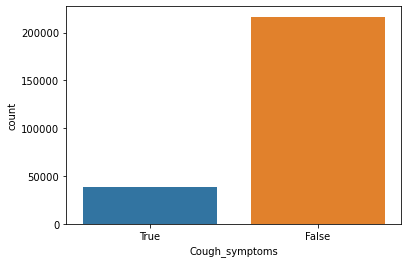

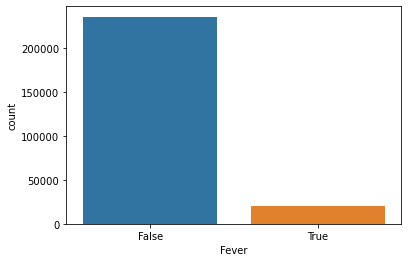

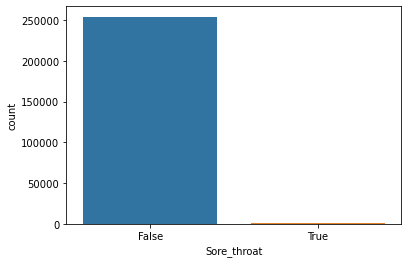

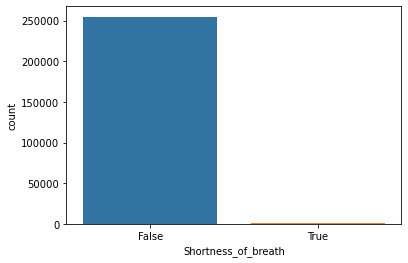

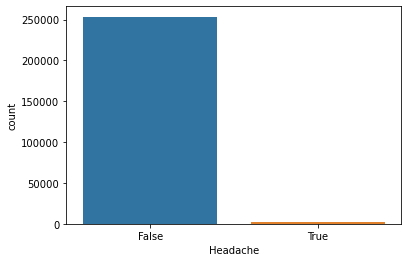

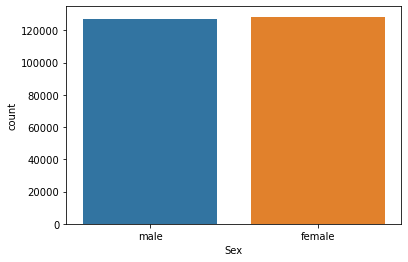

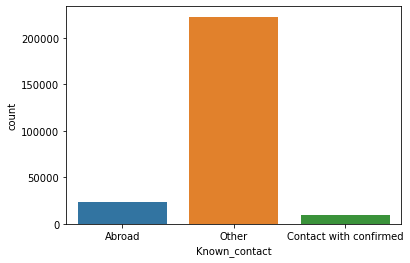

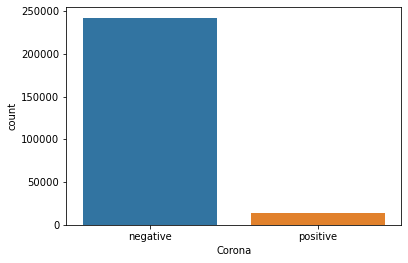

In [26]:
for i in df5.columns:
    sns.countplot(data=df5,x=i)
    plt.show()

The test results which are possitive are low as compared to the test result which are negative and goes same for cough,fever,sore throat,shortness of breath.


Lets do some Bivariate alalysis.

In [27]:
l=[i for i in df5.columns if i!='Corona']

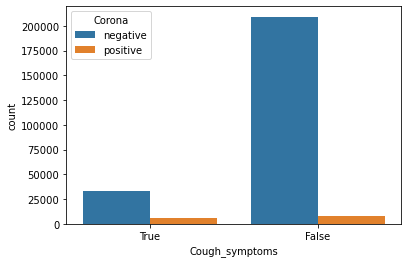

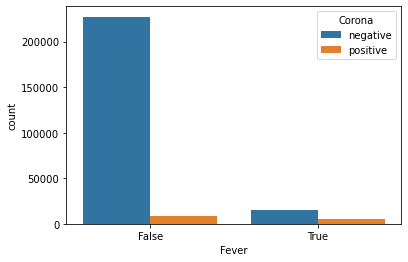

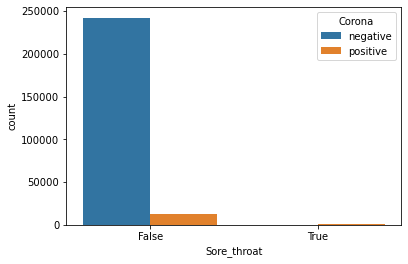

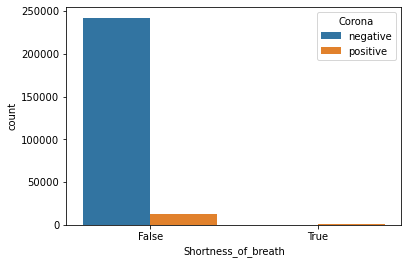

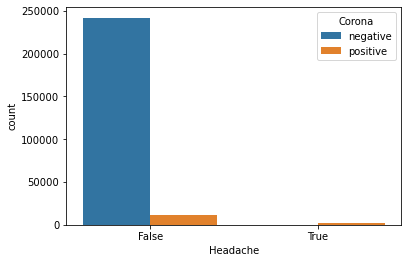

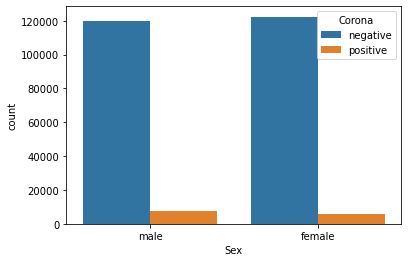

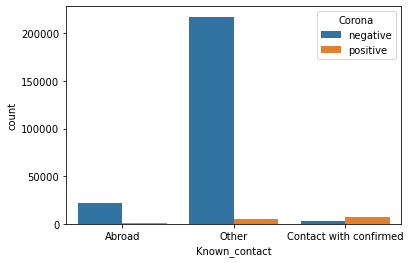

In [28]:
for i in l:
    sns.countplot(data=df5,x=i,hue='Corona')
    plt.show()

We see that headache,shortness of breath,sore_throat,contact,sore throat affect the target variable

Lets split the data into train,test and proceed further.

In [29]:
X=df5.drop('Corona',axis=1)
y=df5.Corona

In [30]:
X

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact
13727,True,False,False,False,False,male,Abroad
13728,True,False,False,False,False,female,Abroad
13730,True,True,False,False,False,female,Other
13734,False,False,False,False,False,male,Other
13735,False,False,False,False,False,female,Other
...,...,...,...,...,...,...,...
278843,False,False,False,False,False,male,Other
278844,False,False,False,False,False,female,Other
278845,False,False,False,False,False,male,Other
278846,False,False,False,False,False,male,Other


In [31]:
from sklearn.preprocessing import OneHotEncoder


In [32]:
encoder = OneHotEncoder(categories='auto',
                       drop='first', # to return k-1, use drop=false to return k dummies
                       sparse=False,
                       handle_unknown='error',dtype='int') 

In [33]:

encoder.fit(X)

OneHotEncoder(drop='first', dtype='int', sparse=False)

In [34]:
encoder.categories_

[array(['False', 'True'], dtype=object),
 array(['False', 'True'], dtype=object),
 array(['False', 'True'], dtype=object),
 array(['False', 'True'], dtype=object),
 array(['False', 'True'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)]

In [35]:
encoder.get_feature_names_out()

array(['Cough_symptoms_True', 'Fever_True', 'Sore_throat_True',
       'Shortness_of_breath_True', 'Headache_True', 'Sex_male',
       'Known_contact_Contact with confirmed', 'Known_contact_Other'],
      dtype=object)

In [36]:
tmp = encoder.transform(X)

tmp = pd.DataFrame(tmp)
tmp.columns = encoder.get_feature_names_out()
X=tmp.copy()
X.head()

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,1


In [37]:
y=y.map({'positive':1,'negative':0})

In [38]:
y

13727     0
13728     0
13730     1
13734     0
13735     0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 255668, dtype: int64

In [39]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
f_p_values = chi2(X,y)

In [40]:
f_p_values

(array([ 8161.47000721, 15989.97741346, 21842.25009598, 15729.73264397,
        34018.17312388,    93.34520088, 83254.65479038,  3812.28419818]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.39245332e-22, 0.00000000e+00, 0.00000000e+00]))

In [41]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

Cough_symptoms_True                     0.000000e+00
Fever_True                              0.000000e+00
Sore_throat_True                        0.000000e+00
Shortness_of_breath_True                0.000000e+00
Headache_True                           0.000000e+00
Sex_male                                4.392453e-22
Known_contact_Contact with confirmed    0.000000e+00
Known_contact_Other                     0.000000e+00
dtype: float64

In [42]:
x=p_values.sort_values(ascending=True)
x

Cough_symptoms_True                     0.000000e+00
Fever_True                              0.000000e+00
Sore_throat_True                        0.000000e+00
Shortness_of_breath_True                0.000000e+00
Headache_True                           0.000000e+00
Known_contact_Contact with confirmed    0.000000e+00
Known_contact_Other                     0.000000e+00
Sex_male                                4.392453e-22
dtype: float64

<AxesSubplot:>

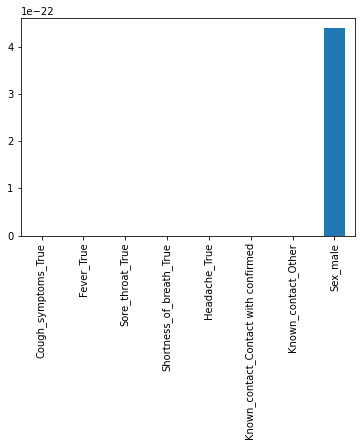

In [43]:
x.plot.bar()

In [44]:
X=X.drop('Sex_male',axis=1)


In [45]:
X.head()

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Known_contact_Contact with confirmed,Known_contact_Other
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


Lets remove sex_male as it has p value greater than 0.05

Now lets see the p values between features 

In [46]:
resultant = pd.DataFrame(data=0,columns= X.columns,index=X.columns)
for i in X.columns:
    for j in X.columns:
        if i!=j:
            chi2_val, p_val = chi2(np.array(X[i]).reshape(-1, 1), np.array(X[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val

In [47]:
resultant

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Known_contact_Contact with confirmed,Known_contact_Other
Cough_symptoms_True,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
Fever_True,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
Sore_throat_True,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
Shortness_of_breath_True,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
Headache_True,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
Known_contact_Contact with confirmed,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
Known_contact_Other,0,0,1.423969e-99,4.588827e-58,6.841254e-140,0,0


In [48]:
resultant[resultant>0.05]

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Known_contact_Contact with confirmed,Known_contact_Other
Cough_symptoms_True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever_True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sore_throat_True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shortness_of_breath_True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headache_True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Known_contact_Contact with confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Known_contact_Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


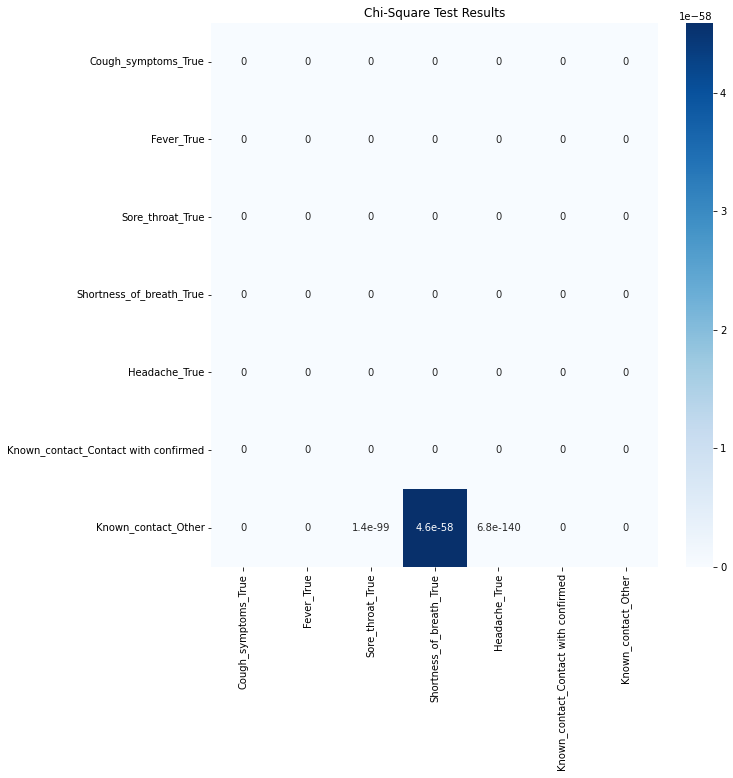

In [49]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

we see that every variables are highly correlated lets perform feature extraction.

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
  
X= pca.fit_transform(X)
  
explained_variance = pca.explained_variance_ratio_

In [51]:
X

array([[ 1.07725714,  0.17064478, -0.47695053],
       [ 1.07725714,  0.17064478, -0.47695053],
       [ 0.81900055, -0.88272871,  0.33359387],
       ...,
       [-0.21774439,  0.0056692 ,  0.00159768],
       [-0.21774439,  0.0056692 ,  0.00159768],
       [-0.21774439,  0.0056692 ,  0.00159768]])

In [52]:
#X=pd.DataFrame(data=X,columns=['pc1','pc2','pc3'])

In [53]:
X

array([[ 1.07725714,  0.17064478, -0.47695053],
       [ 1.07725714,  0.17064478, -0.47695053],
       [ 0.81900055, -0.88272871,  0.33359387],
       ...,
       [-0.21774439,  0.0056692 ,  0.00159768],
       [-0.21774439,  0.0056692 ,  0.00159768],
       [-0.21774439,  0.0056692 ,  0.00159768]])

In [54]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()


In [55]:
### random state train test split will be same with all people using random_state=16
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [56]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train
X_test=scaler.transform(X_test)
X_test
#X_train=pd.DataFrame(data=X_train,columns=['pc1','pc2','pc3'])
#X_test=pd.DataFrame(data=X_test,columns=['pc1','pc2','pc3'])




array([[4.16333634e-17, 4.45861462e-01, 3.07728747e-01],
       [7.73816458e-01, 7.39948540e-01, 1.17845784e-01],
       [4.16333634e-17, 4.45861462e-01, 3.07728747e-01],
       ...,
       [4.16333634e-17, 4.45861462e-01, 3.07728747e-01],
       [4.16333634e-17, 4.45861462e-01, 3.07728747e-01],
       [6.79718548e-01, 5.28657980e-01, 1.86301573e-02]])

In [57]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [58]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [59]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,f1_score

In [61]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[70254  2322]
 [ 1282  2843]]
0.9530123466447634


In [62]:
f1_score(y_test,y_pred)

0.6120559741657695

In [63]:
y_test

216173    0
108265    0
197938    0
68406     0
127867    0
         ..
129456    0
116985    0
227269    1
223796    0
124547    0
Name: Corona, Length: 76701, dtype: int64

In [64]:
X_train

array([[4.16333634e-17, 4.45861462e-01, 3.07728747e-01],
       [3.58946032e-01, 2.01826840e-01, 0.00000000e+00],
       [4.16333634e-17, 4.45861462e-01, 3.07728747e-01],
       ...,
       [6.79718548e-01, 5.28657980e-01, 1.86301573e-02],
       [6.79718548e-01, 5.28657980e-01, 1.86301573e-02],
       [6.79718548e-01, 5.28657980e-01, 1.86301573e-02]])

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
  
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Knearest':{
            'model':KNeighborsClassifier(),
            'params':{'n_neighbors':[5,7,3] 
                
            }
        },
        
        'randomforest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators':[100,200]}
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['entropy', 'gini']}
        
    }}
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)


,model,best_score,best_params
0,Knearest,0.968224,{'n_neighbors': 7}
1,randomforest,0.969654,{'n_estimators': 100}
2,decision_tree,0.969604,{'criterion': 'entropy'}
